In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
sys.path.append('../src')
import utils

## Number of non-zero couplings in QUBO

In [ ]:
gadgets=['Nuesslein1', 'Nuesslein2', 'CJ1', 'CJ2']
n_vars = np.arange(20,401,20)

mark=['x', 'o', 'v', '+']
color=['r', 'blue', 'orange', 'black']
size=[4,3,6,5]

plt.figure(figsize=(6, 4))
i=0
for g in gadgets:
    non_zero_c=[]
    for vars in n_vars:
        with open(f"../exp/e1/Non_0_couplings/{g}/p{vars}/non_zero_couplings.txt", 'r') as fichero:
            l=fichero.readlines()
            non_zero_c.append(eval(l[0]))
    means = [np.median(arr) for arr in non_zero_c]
    q1 = [np.percentile(arr, 25) for arr in non_zero_c]
    q3 = [np.percentile(arr, 75) for arr in non_zero_c]
    plt.plot(n_vars, means, label=g, marker=mark[i], markersize=size[i], markerfacecolor=color[i], markeredgecolor=color[i], markeredgewidth=1, linestyle='None')
    plt.fill_between(n_vars, q1, q3, alpha=0.3)
    i+=1
plt.xlabel('Number of variables (N)')
plt.ylabel('Number of non-zero couplings in Q')
plt.grid(linestyle='--')
plt.legend()
plt.ylim(0,11000)
plt.show()

## Number of physical qubits required

In [7]:
gadgets=['Nuesslein1', 'Nuesslein2', 'CJ1', 'CJ2']
n_vars = np.arange(15,28,3)
num_instances = 20

phys_q = {}
for vars in n_vars:
    list_phys_q=[]
    for g in gadgets:
        list_phys_q_no_mean=[]
        for i in range(num_instances):
            with open(f'../exp/e2/Embeddings/{g}/p{vars}/p{vars}-{i}.txt', 'r') as f:
                lines = f.readlines()
                embedding = eval(lines[0])
            list_phys_q_no_mean.append(len(set([value for sublist in embedding.values() for value in sublist])))
        list_phys_q.append(list_phys_q_no_mean)
    phys_q[vars]=list_phys_q

In [10]:
data_mean={}
data_desv_est={}
for key, values in phys_q.items():
    data_mean[f"V={key},C={int(int(key)*4.2)}"] = [np.mean(arr) for arr in values]
    data_desv_est[f"V={key},C={int(int(key)*4.2)}"] = [np.std(arr) for arr in values]

df = pd.DataFrame(data_mean,gadgets)
print("-----------------------------------------------------\n Mean")
print(df)
df = pd.DataFrame(data_desv_est,gadgets)
print("----------------------------------------------------\n desv_est")
print(df)

-----------------------------------------------------
 Mean
            V=15,C=63  V=18,C=75  V=21,C=88  V=24,C=100  V=27,C=113
Nuesslein1     238.90     308.40     392.00       466.9       561.4
Nuesslein2     150.15     196.55     239.75       282.4       342.8
CJ1            146.05     186.50     231.05       277.2       330.2
CJ2            147.25     187.80     229.00       280.8       330.3
----------------------------------------------------
 desv_est
            V=15,C=63  V=18,C=75  V=21,C=88  V=24,C=100  V=27,C=113
Nuesslein1  13.648809  20.628621  22.192341   23.693670   24.727313
Nuesslein2   6.027230  11.715268  10.774391   11.473448   15.542201
CJ1          8.046583   7.619055   9.129485   12.909686   21.866870
CJ2          7.568851   8.947625  12.214745   16.348089   17.570145


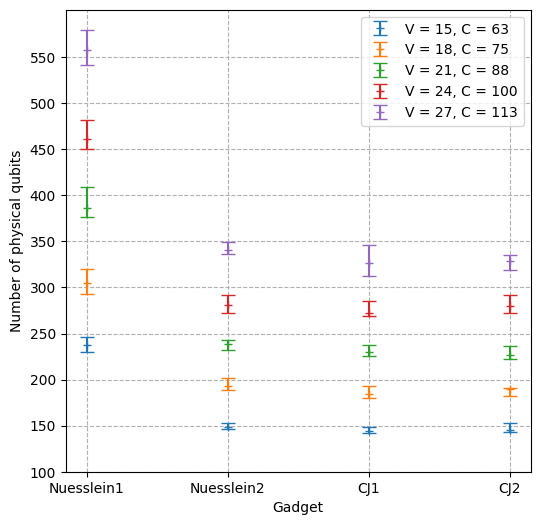

In [11]:
gadgets=['Nuesslein1', "Nuesslein2", 'CJ1', 'CJ2',]
mark=['+', 'o', 'D', 'v', '.']

plt.figure(figsize=(6, 6))
i=0
for key, values in phys_q.items():
    means = [np.median(arr) for arr in values]
    q1 = [np.percentile(arr, 25) for arr in values]
    q3 = [np.percentile(arr, 75) for arr in values]
    plt.errorbar(gadgets, means, yerr=[np.array(means) - np.array(q1), np.array(q3) - np.array(means)], label=f"V = {n_vars[i]}, C = {int(n_vars[i]*4.2)}", marker='+', linestyle='None', capsize=5)
    i+=1
plt.xlabel('Gadget')
plt.ylabel('Number of physical qubits')
plt.grid(linestyle='--')
plt.legend()
plt.yticks(np.arange(100,600,50))
plt.show()

## Solutions with Quantum Annealing (D'Wave)

#### Mean of most optimums found for each gadget and size problem

In [ ]:
gadgets=['Nuesslein1', 'Nuesslein2', 'CJ1', 'CJ2']
n_vars=[5,10,12,20,50]
iterations=20

o={}
for vars in n_vars:
    o_g=[]
    for g in gadgets:
        o_it=[]
        for i in range(iterations):
            with open(f'../exp/e3/DWave/{g}/p{vars}/p{vars}-{i}.txt', 'r') as f:
                lines = f.readlines()
                o_it.append(int(vars*4.2)-int(lines[1].split()[1]))
        o_g.append(np.mean(o_it))
    
    #Exact solution (MaxSatZ)
    o_it=[]
    for i in range(iterations):
        with open(f'../exp/e3/Maxsatz_(exact)/p{vars}-{i}.txt', 'r') as f:
            lines = f.readlines()
            for l in reversed(lines):
                if l[0] == 'o':
                    o_it.append(l.split()[1])
                    break
    o_g.append(np.mean(o_it))
    
    o[f'(V={vars}, C={int(4.2*vars)})']=o_g

In [ ]:
gadgets.append('MaxSatZ')
pd.DataFrame(o, gadgets)

#### Distribution of solutions for each gadget and size problem

In [ ]:
gadgets=['CJ2', 'CJ1', 'nuesslein2']
n_vars=[5,10,12,20,50]
iterations=20

o={}
for vars in n_vars:
    o_g={}
    o_ver={}
    for g in gadgets:
        o_list={}
        for i in range(iterations):
            file_path = f'../exp/e3/problems/p{vars}-{i}.cnf'
            clauses, v = utils.parse_cnf_file(file_path)
            sample_set_str=""
            with open(f'../exp/e3/DWave/{g}/p{vars}/p{vars}-{i}.txt', 'r') as f:
                lines=f.readlines()
                for r in range(4,len(lines)-1):
                    if r==4:
                        sample_set_str+=lines[r][55:]
                    elif r==len(lines)-2:
                        line=lines[r].replace(" ", "")
                        sample_set_str+=line[:-2]
                    else:
                        sample_set_str+=lines[r]
                sample_set=eval(sample_set_str)
                for sample in sample_set:
                    assignment={i+1:sample[0][i] for i in range(len(sample[0]))}
                    o_found = int(utils.count_unsatisfied_clauses(assignment, clauses))
                    o_compare = utils.compare_with_exact(g, vars, i, o_found)
                    if o_compare not in o_list.keys():
                        o_list[o_compare]=sample[-2]
                    else:
                        o_list[o_compare]+=sample[-2]
        o_g[g]={key:value/iterations for key, value in o_list.items()} #value/(iterations*num_reads)*100%
    o[f'(V={vars}, C={int(4.2*vars)})']=o_g

In [ ]:
fig, axs = plt.subplots(3, 2, figsize=(8, 12))

i = 0
for o_vars in o.values():
    j = -1
    k=0
    for o_g_name, o_g in o_vars.items():
        x_pos=[x+j*0.2 for x in list(o_g.keys())]
        axs[i // 2, i % 2].bar(x_pos, o_g.values(), label=gadgets[k], width=0.2)
        j += 1
        k += 1
    axs[i // 2, i % 2].set_title(list(o.keys())[i])
    axs[i // 2, i % 2].set_xlabel('Optimum difference')
    axs[i // 2, i % 2].set_ylabel('Percentage (%)')
    if i==0:
        axs[i // 2, i % 2].set_ylim(0,90)
    if i in [1,2,3]:
        axs[i // 2, i % 2].set_ylim(0,50)
    if i!=4:
        axs[i // 2, i % 2].set_xlim([-0.6, 2.6])
        axs[i // 2, i % 2].set_xticks(np.arange(3))
    if i==4:
        axs[i // 2, i % 2].set_xlim([-0.6, 5.6])
        axs[i // 2, i % 2].set_xticks(np.arange(6))
        axs[i // 2, i % 2].set_ylim(0,16)
    axs[i // 2, i % 2].legend()
    i += 1

plt.tight_layout()
plt.show()